<center><h1><i><b> Machine Learning Analysis for Twitter Bot Detection</b></i></h1></center>

<center>
<img style="float: center; padding-right:" src="https://raw.githubusercontent.com/fayzantalpur/DS1-Twitter-Bot-Detection/master/Images%20and%20Graphs/Twitter_Bot_Image.png">
</center>
  
<center> <i><b> CS109A: Harvard University, Fall 2018 </b></i> <center> 
<center> <i><b> Final Project: Milestone 4 </b></i> <center>     
<center> <i><b> Contributors: Group #68: Nisrine Elhauz, Huan Liu, Fayzan Talpur, Samasara Tamrakar </b></i> <center> 
___

<a id ='TOC'></a>
#### Table of Contents
1. [Introduction](#Introduction) <br/>
    1.1 [Motivation](#Motivation) <br/>
    1.2 [Problem Statement](#Problem-Statement) <br/>
2. [Data](#Data) <br/>
    2.1 [Data in Twitter API](#Data-in-Twitter-API) <br/>
    2.2 [Collection of Data](#Collection-of-Data) <br/>
    2.3 [Data Labelling: Using Botometer](#Labelling-Botometer) <br/>
    2.4 [Data Labelling: Manually](#Labelling-Manual) <br/>
    2.5 [Data Collection: Most Recent 100 Tweets per Each User](#Data-Collection-Recent) <br/>
    2.6 [Description of Raw Data (Tweets)](#Description-of-Raw-Data) <br/>  
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis) <br/>
    3.1 [Data Wrangling and Cleansing](#Data-Wrangling-Cleansing) <br/>
    3.2 [Feature Engineering](#Feature-Engineering) <br/>
    3.3 [Important Features](#Important-Features) <br/>
    3.4 [Relations in Data](#Relations-in-Data) <br/>
    3.5 [Standardization](#Standardization) <br/>   
4. [Models](#Models) <br/>
    4.1 [Baseline Model](#Baseline-Model) <br/>
    4.2 [Logistic Regression](#Logistic-Regression) <br/>
    4.3 [KNN](#KNN) <br/>
    4.4 [Random Forest](#Random-Forest) <br/>
    4.5 [SVM](#SVM) <br/>
    4.6 [RNN](#RNN) <br/>
    4.7.[K-Means Clustering](#KMeans-Clustering)<br/>
5. [Results and Conclusion](#Results-and-Conclusion) <br/>
    5.1 [Summary of Results](#Summary-of-Results) <br/>
    5.2 [Noteworthy Findings](#Noteworthy-Findings) <br/>
    5.3 [Conclusion and Future Work](#Conclusion-and-Future-Work) <br/>
6. [Literature Review and Related Work](#Literature-Review-and-Related-Work) <br/>
    6.1 [Bots in the Twittersphere](#Bots-in-the-Twittersphere) <br/>
    6.2 [How Twitter Bots Help Fuel Political Feuds](#How-Twitter-Bots-Help-Fuel-Political-Feuds) <br/>
    6.3 [The spread of low-credibility content by social bots](#The-spread-of-low-credibility-content-by-social-bots) <br/>
    6.4 [Twitter Topic Modeling by Tweet Aggregation](#Twitter-Topic-Modeling-by-Tweet-Aggregation) <br/>
    6.5 [The tweepy Python Library](#tweepy-library) <br/>
    6.6 [Twitter's Developer Resources](#twitter-developer) <br/> 

___

[Back to TOC](#TOC) <br/>
<a id ='Introduction'></a>
### 1- Introduction

The main objective of the project is explore twitter dataset using twitter API and try to create a learning algorithim that can differentiate between bot and human.

[Back to TOC](#TOC) <br/>
<a id ='Motivation'></a>
#### 1.1 - Motivation <br/>

<mark> Some Text Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='Problem-Statement'></a>
#### 1.2 - Problem Statement <br/>
How to detect Twitter Bots using tweets data from Twitter developer API by using machine learning techniques. Our objective is to determine whether the source of tweets are from accounts that are bot users [1] or non-bot users [0].  (we define bot as: no direct human involvement in generating tweets) <br/>
1. Start by collection data using Twitter API, then use feature engineering and preprocessing techniques to extract relevant data.
2. Use Data visualization to understand the trend and patterns. 
3. Solve as a classification problem of classifying an account to be bot or not-bot
4. Solve as an unsupervised problem of clustering twitter accounts into 2 (or several) clusters
5. Conclude by comparing the models

In [ ]:
#@title 
# Import Libraries, Global Options and Styles
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)
%matplotlib inline

# Import libraries
import warnings
warnings.filterwarnings('ignore')

#import tweepy
import random
random.seed(112358)

%matplotlib inline
import numpy as np
import scipy as sp
import json as json
import pandas as pd
#import jsonpickle
import time


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn.apionly as sns
sns.set(style="darkgrid")
sns.set_context("poster")

[Back to TOC](#TOC) <br/>
<a id ='Data'></a>
### 2 - Data <br/>

We started with three potential approaches to collect data for bot detection:

##### Approach 1: Collect Tweets then Label Bot / Real Users: 
*Approach* - Collect Tweets via Twitter API, extract accounts, then use Botometer API to label bot / real-user<br/>
*Pros* - flexible in collecting the specific data we are interested <br/>
*Cons* - using Botometer to label accounts might result in a fitting of Botometer's algorithms

##### Approach 2: Collect Bot and Real Users Separately
*Approach* - Manually select / verify bots account, use verified twitter profile accounts for the real user dataset, then use Twitter API to collect Tweets from the selected accounts <br/>
*Pros* - very accurate response (bot / real user) <br/>
*Cons* - time consuming and therefore small data size

##### Approach 3: Use Existing Annotated Dataset
*Approach* - Use existing datasets that have already labelled the tweets as bot / real-user <br/>
*Pros* - convenient <br/>
*Cons* - less flexible in collecting tweets with specific topic; results highly rely on the labelling accuracy

After evaluating the three approaches, we decided to collect our own tweets and use Botometer to label the bot / real-user. We decided to use the following approach to collect and label our data:

##### Step 1: Collection of Data : Collect over 1000 Tweets using Keywords
##### Step 2: Data Labelling: Using Botometer
##### Step 3: Data Labelling: Manual Verification for Each Account (Until Reach 50 Bots 50 Real Users)
##### Step 4: Data Collection - Get 3,200 (max) Most Recent Tweets from Each Verified Bot / User

[Back to TOC](#TOC) <br/>
<a id ='Data-in-Twitter-API'></a>
#### 2.1 - Data Source: Twitter API

Twitter offers a public API to interact with its platform. The API has different tiers representing different level of access to twitter platform. The API used in this project is the free twitter search API. The main points about this API are as following

1. Search tweets by keywods, usernames, locations, named places, etc.
2. its not clear if search criteria is limited to tweet itself or the username or a place.
3. The return data comes in  JSON format with different containers representing different aspects of tweet.

Since this is a free API, there are many limitations here as well. Some of these limitations are as following
1. Returned Data is a random sample of matching keywords.
2. Limited to 5,000 tweets per keyword.
3. Limit of 180 requests in a 15 minute period.
4. The respective data comes from last 7 days.

[Back to TOC](#TOC) <br/>
<a id ='Collection-of-Data'></a>
#### 2.2 - Collection of Data : Collect over 1000 Tweets using Keywords

We first collected some tweets that contains one of the following keywords that are likely to lead to controversial topics:  <br/>
>  1) Immigration <br/>
>  2) Brexit <br/>
>  3) bitcoin <br/>

We used keywords of more controversial topics as those are more likely to have non-obvious bots, which are more difficult to detect. We inferred this based on Baraniuk's article, "How Twitter Bots Help Fuel Political Feuds". 

We requested every 2 seconds for 100 tweets each for 15 request and received 1277 tweets.

In [ ]:
# http://www.tweepy.org/
import tweepy

# Replace the API_KEY and API_SECRET with your application's key and secret.
auth = tweepy.AppAuthHandler("API KEY", "SECRET")

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
 
if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)

In [ ]:
# The following code was adapted from sample code provided by TFs / Profs for this project

def collect_tweets(maxTs, requestCount, filename):
    searchQuery = 'Immgration OR Brexit OR bitcoin'  # this is what we're searching for
    maxTweets = maxTs # some arbitrary large number
    tweetsPerQry = 100  # this is the max the API permits
    fName = filename # we'll store the tweets in a text file.

    # If results from a specific ID onwards are reqd, set since_id to that ID.
    # else default to no lower limit, go as far back as API allows
    sinceId = None

    # If results only below a specific ID are, set max_id to that ID.
    # else default to no upper limit, start from the most recent tweet matching the search query.
    max_id = -1
    error_count = 0

    request_count = 0

    tweetCount = 0
    
    
    print("Downloading max {0} tweets".format(maxTweets))
    with open(fName, 'w') as f:
        while tweetCount < maxTweets and request_count < requestCount:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry)
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break
                for tweet in new_tweets:
                    f.write(jsonpickle.encode(tweet._json, unpicklable=False) +
                            '\n')
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id
                request_count += 1
                time.sleep(2)
            except tweepy.TweepError as e:
                # Just exit if any error
                error_count += 1
                print("some error : " + str(e))
                time.sleep(2)
                if error_count >= 5:
                    print("too many errors ....break.")
                    break

    print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

In [ ]:
# we first collected a small sample data of about 1000 (which we will use botometer to encode)
collect_tweets(1500, 13, 'immigration_brexit_bitcoin.json')

A small sample dataset (from which we will manually verify 25 bots and 25 real user accounts): <br/>
We requested every 2 seconds for 100 tweet each for 13 reqyests and received 1277 tweets.

In [ ]:
# then we collect a larger sample (which we will use botometer to encode)
collect_tweets(12000, 120, 'immigration_brexit_bitcoin_extended.json')

In [ ]:
# load the file
raw_df_core = pd.read_json('immigration_brexit_bitcoin.json')
raw_df_extended = pd.read_json('immigration_brexit_bitcoin_extended.json', lines=True)

In [ ]:
# take a look at the separate data
display(raw_df_core.shape)
display(raw_df_extended.shape)

In [ ]:
# combine the two data sets
raw_df = pd.concat([raw_df_core, raw_df_extended], ignore_index=True)

In [ ]:
# take a look at the combined data
display(raw_df.head(5))
display(raw_df.shape)

In [ ]:
raw_df.shape

In [ ]:
# delete duplicate accounts
raw_df = raw_df.drop_duplicates(subset='id_str')
raw_df.shape

In [ ]:
# save as csv
raw_df.to_csv('immigration_brexit_bitcoin_full.csv')

# save as json
raw_df.to_json('immigration_brexit_bitcoin_full.json')

[Back to TOC](#TOC) <br/>
<a id ='Labelling-Botometer'></a>
#### 2.3 - Data Labelling: Using Botometer

<mark> add some text <mark>

In [ ]:
#load the data
raw_df = pd.read_json('immigration_brexit_bitcoin_full.json')
raw_df.head(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,None,2018-12-04 06:10:17,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",None,0,False,None,1069836265804259328,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,0.0,None,NaN,NaN,0,False,None,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Coinpot Faucets That Pay Out Free Bitcoin Inst...,False,"{'contributors_enabled': False, 'created_at': ..."
1,NaN,None,2018-12-04 06:10:16,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",None,0,False,None,1069836265581961216,brexit_politics,1.069767e+18,1.069767e+18,8.981611e+17,8.981611e+17,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,None,NaN,NaN,0,False,None,"<a href=""http://twitter.com/download/android"" ...",@brexit_politics Because the cocoa plant is na...,False,"{'contributors_enabled': False, 'created_at': ..."
10,NaN,None,2018-12-04 06:10:14,"{'hashtags': [{'indices': [37, 44], 'text': 'F...",None,0,False,None,1069836254169235456,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,None,NaN,NaN,3,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @StuckOnCrypto: Phenomenal gains! #Factom $...,False,"{'contributors_enabled': False, 'created_at': ..."
100,NaN,None,2018-12-04 06:09:22,"{'hashtags': [{'indices': [14, 21], 'text': 'B...",None,0,False,None,1069836035872428032,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,None,NaN,NaN,2,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://forwardas.one"" rel=""nofollow"">...",RT @bbc5live: #Brexit – give us your speech to...,False,"{'contributors_enabled': False, 'created_at': ..."
1000,NaN,None,2018-12-04 06:00:22,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/2w...,0,False,None,1069833771778744320,None,NaN,NaN,NaN,NaN,False,tr,"{'iso_language_code': 'tr', 'result_type': 're...",None,0.0,None,NaN,NaN,0,False,None,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Money Button CEO’su: “Bitcoin problemi Bitcoin...,False,"{'contributors_enabled': False, 'created_at': ..."


In [ ]:
# add account id to dataframe
raw_df['id'] = raw_df['user'].map(lambda d: d['id'])

In [ ]:
# set up botometer
# the code below was adapted from 
# https://github.com/IUNetSci/botometer-python

import botometer

mashape_key = "mashape key"
twitter_app_auth = {
    'consumer_key': 'CONSUMER KEY',
    'consumer_secret': 'CONSUMER SECRET',
    'access_token': 'API KEY',
    'access_token_secret': 'API SECRET',
  }
bom = botometer.Botometer(wait_on_ratelimit=True,
                          mashape_key=mashape_key,
                          **twitter_app_auth)

In [ ]:
# retrieve response objects from Botometer
botometer_results = {}
count = 0
for index, user_id in raw_df['id'].iteritems():
    botometer_results[index] = bom.check_account(user_id)
    print (count)
    count +=1
    time.sleep(3)

In [ ]:
# convert to series
botometer_series = pd.Series(botometer_results)

In [ ]:
# add results to a new column
raw_df['botometer_result'] = botometer_series

In [ ]:
# a quick look at botometer results
raw_df['botometer_result'][0]

In [ ]:
# extract universal score (botometer score)
raw_df['boto_univ'] = raw_df['botometer_result'].map(lambda s: s['cap']['universal'])
raw_df['boto_univ'].describe()

In [ ]:
# encode bot / non-bot via score of 0.5 threshold
threshold = 0.5
raw_df['class_boto'] = np.where(raw_df['boto_univ']>threshold, 1, 0)

In [ ]:
# examine number of 'bots' as identified by Botometer
sum(raw_df['class_boto'])

In [ ]:
# save as csv
raw_df.to_csv('immigration_brexit_bitcoin_boto.csv')

# save as json
raw_df.to_json('immigration_brexit_bitcoin_boto.json')

[Back to TOC](#TOC) <br/>
<a id ='Labelling-Manual'></a>
#### 2.4 - Data Labelling: Manual Verification for Each Account (Until Reach 50 Bots 50 Real Users)

We verified accounts by manually searching the username to check whether they were a bot or not using our best judgement. Usually, "Verified" Twitter accounts are often real users or obvious bots (e.g. Netflix). <br/>

Meanwhile, we only want to look at English tweets. <br/>

The following rules are used for manual Twitter account verification: <br/>
1) Constant retweets of media (especially only retweets no replies)  <br/>
2) Strong concentration on a specific topic <br/>
3) Significantly large number of tweets <br/>
4) Significantly large number of replying - not humanly possible speed <br/>
<mark> (add more verification rules) <mark>
  
During identification......<mark> add text <mark> <br/>
 
After examing the accounts associated with the tweets, we selected 50 bot accounts and 50 real user accounts that we feel confident in their classification.
  

In [ ]:
# load the core / small dataset, from which we will manually identify 25 bots and 25 non-bot accounts
raw_df_core = pd.read_json('immigration_brexit_bitcoin.json')
raw_df_core.head(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,botometer_result,boto_univ,class_boto,id
0,NaN,None,2018-12-04 06:10:17,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",None,0,False,None,1069836265804259328,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,0.0,None,NaN,NaN,0,False,None,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Coinpot Faucets That Pay Out Free Bitcoin Inst...,False,"{'contributors_enabled': False, 'created_at': ...","{'cap': {'english': 0.5650534221, 'universal':...",0.661264,1,389263463
1,NaN,None,2018-12-04 06:10:16,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",None,0,False,None,1069836265581961216,brexit_politics,1.069767e+18,1.069767e+18,8.981611e+17,8.981611e+17,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,None,NaN,NaN,0,False,None,"<a href=""http://twitter.com/download/android"" ...",@brexit_politics Because the cocoa plant is na...,False,"{'contributors_enabled': False, 'created_at': ...","{'cap': {'english': 0.0467737825, 'universal':...",0.199883,0,1049565246711623680
10,NaN,None,2018-12-04 06:10:14,"{'hashtags': [{'indices': [37, 44], 'text': 'F...",None,0,False,None,1069836254169235456,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,None,NaN,NaN,3,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @StuckOnCrypto: Phenomenal gains! #Factom $...,False,"{'contributors_enabled': False, 'created_at': ...","{'cap': {'english': 0.0017254577000000001, 'un...",0.002308,0,213374157
100,NaN,None,2018-12-04 06:09:22,"{'hashtags': [{'indices': [14, 21], 'text': 'B...",None,0,False,None,1069836035872428032,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,None,NaN,NaN,2,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://forwardas.one"" rel=""nofollow"">...",RT @bbc5live: #Brexit – give us your speech to...,False,"{'contributors_enabled': False, 'created_at': ...","{'cap': {'english': 0.4522790023, 'universal':...",0.559158,1,1008465833046298625
1000,NaN,None,2018-12-04 06:00:22,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/2w...,0,False,None,1069833771778744320,None,NaN,NaN,NaN,NaN,False,tr,"{'iso_language_code': 'tr', 'result_type': 're...",None,0.0,None,NaN,NaN,0,False,None,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Money Button CEO’su: “Bitcoin problemi Bitcoin...,False,"{'contributors_enabled': False, 'created_at': ...","{'cap': {'english': 0.4827005207, 'universal':...",0.199883,0,1189983314


In [ ]:
# to verify each user, we only need "screen_name"
raw_df_core['screen_name'] = raw_df_core['user'].map(lambda d: d['screen_name'])

In [ ]:
# add botometer score to the core dataset
raw_df_core = pd.merge(raw_df_core, raw_df[['class_boto','class_verified', 'boto_univ', 'screen_name']], left_on='screen_name', right_on='screen_name')

In [ ]:
# form a simple dataframe with only screen_name and Botometer score for references (so we can manually verify accounts)
# create 'class_verified for verified score'
raw_df_verify = raw_df_core.loc[:,['screen_name', 'class_boto', 'boto_univ','class_verified']]

In [ ]:
# delete duplicate rows
raw_df_verify.drop_duplicates(subset='screen_name')

,screen_name,class_boto,boto_univ,class_verified
0,ICVeo,1,0.661264,NaN
1,SamGuile2,0,0.199883,NaN
10,BadassJack101,0,0.002308,NaN
100,FAO_Scotbot,1,0.559158,NaN
1000,Habereglencee,0,0.199883,NaN
1001,cryptanalyser,0,0.104603,NaN
1002,boaleo,0,0.180303,NaN
1003,kasootsuuka,0,0.415826,NaN
1004,Diana_1aLectura,0,0.009037,NaN
1005,MasterNodesPro,0,0.221216,NaN


In [ ]:
# save as csv (so we can manually verify and input results in excel)
raw_df_verify.to_csv('boto_to_verify.csv')

[Back to TOC](#TOC) <br/>
<a id ='Data-Collection-Recent'></a>
#### 2.5 - Data Collection - Get 200 (max) Most Recent Tweets from Each Account

For each tweet, we requested users' most recent 200 tweets using api.user_timeline via tweepy. <br/>

In [ ]:
# get the list of bot names and non-bot names
users_list = raw_df.loc[raw_df_verify['class_boto']==0]['screen_name'].tolist()
bots_list = raw_df.loc[raw_df_verify['class_boto']==1]['screen_name'].tolist()

# get the list of names
names = users_list + bots_list

In [ ]:
def get_tweets(names, fName, t_count, verify_df):
    # INPUT:
    # names: list of screen_name
    # fName: file name, .json
    # t_count: maximum number of tweets for each user
    # verify_df: a dataframe with 1) screen name; 2) class_bot; 3) class_verified; 4) boto_univ
    # OUTPUT:
    # tweets: pd dataframe of all the tweets
    
    # get tweets
    with open(fName, 'w') as f:
        tweetCount = 0
        for name in names:
            try:
                tweets = api.user_timeline(screen_name=name, count=t_count, tweet_mode='extended')
                for tweet in tweets:
                    f.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
                print("Downloaded {} tweets.".format(len(tweets)))
                tweetCount += len(tweets)
                time.sleep(5)
            except tweepy.TweepError as e:
                # Just exit if any error
                error_count += 1
                print("some error : " + str(e))
                if error_count >= 5:
                    print("too many errors ....break.")
                    break
    print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))
    
    # add botometer 
    tmp_df = pd.read_json(fName, lines=True)
    tmp_df['user_screen_name'] = tmp_df['user'].map(lambda d: d['screen_name'])
    tmp_boto_df = pd.merge(tmp_df, verify_df[['class_boto','class_verified', 'boto_univ', 'screen_name']], left_on='user_screen_name', right_on='screen_name')
    tmp_boto_df = tmp_boto_df.drop(columns=['user_screen_name'])
    return tmp_boto_df

In [ ]:
# get max 200 tweets for each user
tweets_df = get_tweets(names=names, fName='tweets.json', t_count=200, verify_df=raw_df_verify) #the fName and corresponding data will be updated later

[Back to TOC](#TOC) <br/>
<a id ='Description-of-Raw-Data'></a>
#### 2.6 - Description of Raw Data (Tweets)

<mark>(TO BE UPDATED)<mark> <br/>
  
<mark> Updated some field descriptions below from [Tweets Data Dictionary](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object): <mark> <br/>
<mark> add more if necessary <mark>
   
 
Among the data we collected as json files from the tweepy api.search, the data set contains objects such as ‘user’, which includes comprehensive information of user accounts. Additionally, detailed information about each individual tweet was also collected.

The following describes some of the fields from the raw data collected, that we thought were relevant:

**Tweet Data**

> *created_at*: UTC time when this Tweet was created  <br/>
>  *display_text_range*: delineates different sections of body for mentions/tweets/entities <br/>
>  *extended_entities*: contains a single media array of media objects <br/>
>  *favorite_count*: approximately how many times Tweet has been liked by Twitter users <br/>
>  *favorited*: Indicates whether this Tweet has been liked by the authenticating user <br/>
>  *full_text*: actual UTF-8 text of the status update  <br/>
>  *id*: The integer representation of the unique identifier for this Tweet <br/>
>  *in_reply_to_screen_name*: If Tweet is a reply, field will contain the screen name of the original Tweet’s author<br/>
>  *is_quote_status*: Indicates whether this is a Quoted Tweet  <br/>
>  *possibly_sensitive*: only surfaces when a Tweet contains a link. The meaning of the field doesn’t pertain to the Tweet content itself, but instead it is an indicator that the URL contained in the Tweet may contain content or media identified as sensitive content.<br/>
>  *retweet_count*: Number of times this Tweet has been retweeted <br/>
>  *retweeted*: Indicates whether this Tweet has been Retweeted by the authenticating user  <br/>
>  *retweeted_status*: Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. This attribute contains a representation of the original Tweet that was retweeted <br/>
>  *truncated*: Indicates whether value of text parameter was truncated, e.g., as a result of a retweet exceeding the original Tweet text length limit of 140 characters. Truncated text will end in ellipsis, like this ... <br/>
>  *screen_name*: screen name, handle, or alias of user who posted the Tweet <br/>  
   
   

**User Data**
  
>  *user_created_at*: UTC datetime that the user account was created on Twitter  <br/>
>  *user_description*:  user-defined UTF-8 string describing their account <br/>
>  *user_favourites_count*: number of Tweets this user has liked in the account’s lifetime <br/>
>  *user_followers_count*:  number of followers this account currently has<br/>   
>  *user_friends_count*: number of users this account is following (AKA their “followings”)<br/>
>  *user_listed_count*: number of public lists that this user is a member of<br/>
>  *user_location*: The user-defined location for this account’s profile. Not necessarily a location, nor machine-parseable<br/>
>  *user_name*: name of the user, as they’ve defined it. Not necessarily a person’s name<br/>
>  *user_profile_background_image_url*: HTTP-based URL pointing to the background image the user has uploaded for their profile <br/>   
>  *user_screen_name*: screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change, use id_str as a user identifier if possible.<br/>
>  *user_statuses_count*: number of Tweets (including retweets) issued by the user<br/>
>  *user_description_len*: length of user_description field string <br/>



Botometer’s response object returned bot-scores in various different categories. This included categories such as the Complete Automation Probability, which determines how likely the account is a bot. The bot-scores, on a scale, determines if a given account is closer to a bot or a real user. Then. from the json data we gathered through the tweepy api.search, we extracted user account id to retrieve their corresponding Botometer scores. 


[Back to TOC](#TOC) <br/>
<a id ='Exploratory-Data-Analysis'></a>
### 3.1 - Exploratory Data Analysis
Include only features with value and drop features with mostly null value

[Back to TOC](#TOC) <br/>
<a id ='Data-Wrangling'></a>
#### 3.1 - Data Wrangling & Cleansing

parsing features, Include only features with value and drop features with mostly null value

In [ ]:
# read the dataset
tweets_df = pd.read_json('tweets.json', lines=True)

In [ ]:
# explode 'entities', 'user'
# although it would be interesting to see 'retweeted_status', it might be a bit too complicated
# especially when the # of reweets of the retweeted post is availabel directly ('retweet_count')
# it might be more efficient just to add a new column showing if a tweet contains retweet
def explode(df):
    dicts = ['user', 'entities']
    for d in dicts:
        keys = list(df.iloc[0]['user'].keys())
        for key in keys:
            df[str(d) + '_' + key] = df[d].map(lambda x: x[key] if key in x and x[key] else None)    
    return df

In [ ]:
# parse
tweets_df = explode(tweets_df)
tweets_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user,withheld_in_countries,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,...,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,entities_contributors_enabled,entities_created_at,entities_default_profile,entities_default_profile_image,entities_description,entities_entities,entities_favourites_count,entities_follow_request_sent,entities_followers_count,entities_following,entities_friends_count,entities_geo_enabled,entities_has_extended_profile,entities_id,entities_id_str,entities_is_translation_enabled,entities_is_translator,entities_lang,entities_listed_count,entities_location,entities_name,entities_notifications,entities_profile_background_color,entities_profile_background_image_url,entities_profile_background_image_url_https,entities_profile_background_tile,entities_profile_banner_url,entities_profile_image_url,entities_profile_image_url_https,entities_profile_link_color,entities_profile_sidebar_border_color,entities_profile_sidebar_fill_color,entities_profile_text_color,entities_profile_use_background_image,entities_protected,entities_screen_name,entities_statuses_count,entities_time_zone,entities_translator_type,entities_url,entities_utc_offset,entities_verified
0,NaN,NaN,2018-12-06 09:42:52,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,False,RT @David_Dowse1: Have you seen @jeremycorbyn ...,NaN,1070614540746977281,1070614540746977280,None,NaN,NaN,NaN,NaN,False,en,None,NaN,NaN,NaN,NaN,NaN,278,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,None,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,{'description': {'urls': []}},13997.0,None,3080,None,3073.0,None,None,2772143657,2772143657,None,None,en,...,None,do_mck,108501,None,none,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NaN,NaN,2018-12-06 09:42:45,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,False,RT @MrHickmott: In your street there lives som...,NaN,1070614514238922753,1070614514238922752,None,NaN,NaN,NaN,NaN,False,en,None,NaN,NaN,NaN,NaN,NaN,1586,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,None,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,{'description': {'urls': []}},13997.0,None,3080,None,3073.0,None,None,2772143657,2772143657,None,None,en,...,None,do_mck,108501,None,none,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,2018-12-06 09:42:25,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,False,"RT @JumMurphy: The Unite general secretary, Le...",NaN,1070614428859727872,1070614428859727872,None,NaN,NaN,NaN,NaN,False,en,N

In [ ]:
# append botometer univ_value and classifications
tweets_df = pd.merge(tweets_df, raw_df_verify[['screen_name', 'class_boto', 'boto_univ', 'class_verified']], left_on='user_screen_name', right_on='screen_name')
len(tweets_df.columns.values)

120

In [ ]:
# heatmap to visualize the missing data in different columns
sns.set(style="darkgrid")
sns.set_context("poster")

def get_heatmap(df, imgName='NaN_heatmap.png'):
    #This function gives heatmap of all NaN values or only zero
    plt.figure(figsize=(20,10))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap="YlGnBu").set_title('Missing Data in Column 0 to 20')

    plt.tight_layout()
    
    # save image for report, need to run cell  
    plt.savefig(imgName)
    
    return plt.show()

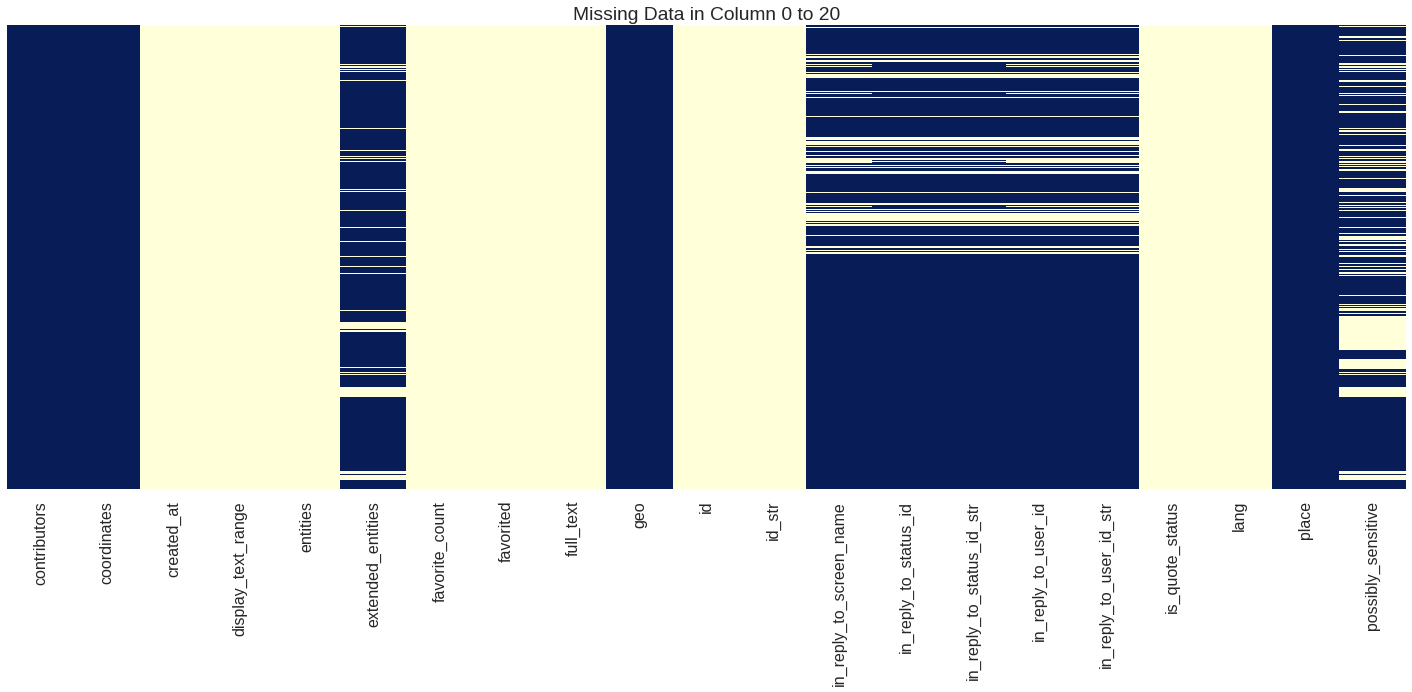

In [ ]:
#plotting first null values
get_heatmap(tweets_df.ix[:,0:21], imgName='NaN_heatmap_col0_20.png')

In [ ]:
# obviously there are many columns are mostly missing values
# we want to drop the columns that miss more than 50% of the time
threshold = len(tweets_df.columns.values)*0.5
tweets_df_clean = tweets_df.dropna(thresh = threshold, axis='columns')

In [ ]:
# take a look at the columns left (reduced from 116 to 59 columns)
display(len(tweets_df_clean.columns.values))
display(tweets_df_clean.head(5))

63

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_followers_count,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_lang,user_listed_count,user_location,user_name,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_screen_name,user_statuses_count,user_translator_type,user_url,screen_name,class_boto,boto_univ,class_verified
0,2018-12-06 09:42:52,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,False,RT @David_Dowse1: Have you seen @jeremycorbyn ...,1070614540746977281,1070614540746977280,None,NaN,NaN,NaN,NaN,False,en,NaN,NaN,NaN,NaN,NaN,278,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,{'description': {'urls': []}},13997.0,3080,3073.0,None,None,2772143657,2772143657,en,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0
1,2018-12-06 09:42:45,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,False,RT @MrHickmott: In your street there lives som...,1070614514238922753,1070614514238922752,None,NaN,NaN,NaN,NaN,False,en,NaN,NaN,NaN,NaN,NaN,1586,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,{'description': {'urls': []}},13997.0,3080,3073.0,None,None,2772143657,2772143657,en,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0
2,2018-12-06 09:42:25,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,False,"RT @JumMurphy: The Unite general secretary, Le...",1070614428859727872,1070614428859727872,None,NaN,NaN,NaN,NaN,False,en,NaN,NaN,NaN,NaN,NaN,15,False,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,{'description': {'urls': []}},13997.0,3080,3073.0,None,None,2772143657,2772143657,en,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0
3,2018-12-06 09

In [ ]:
# duplicated columns
col_duplicate = ['entities','user', 'id_str', 'lang', 'user_lang', 'user_id', 'user_id_str']
# we dropped 'lang' as we only use english accounts for our dataset
# 'entities' and 'user' have already been parsed

# columns that we are obviously not itnerested
col_not_interested = ['source', 'user_entities']
# retweeted_status is the tweet object of the retweet - perhaps 

In [ ]:
# drop duplicated columns and columns that we are not interested
tweets_df = tweets_df_clean.drop(columns= (col_duplicate + col_not_interested))

[Back to TOC](#TOC) <br/>
<a id ='Data-Cleansing'></a>
#### 3.2 - Feature Engineering
feature engineering<br/>
<mark> add text - code to be updated <mark>

[Back to TOC](#TOC) <br/>
<a id ='Data-Cleansing'></a>
##### 3.2.1 - Feature Engineering - Tweet Features
feature engineering of tweet features: <br/>
1) text_rt: text of the retweet <br/>
2) text_tweet: text of the tweet (when there is no retweet) <br/>
3) encode tweet features <br/>

In [ ]:
tweets_df.head()

,created_at,display_text_range,extended_entities,favorite_count,favorited,full_text,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,truncated,user_created_at,user_default_profile,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_geo_enabled,user_has_extended_profile,user_listed_count,user_location,user_name,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_screen_name,user_statuses_count,user_translator_type,user_url,screen_name,class_boto,boto_univ,class_verified
0,2018-12-06 09:42:52,"[0, 140]",NaN,0,False,RT @David_Dowse1: Have you seen @jeremycorbyn ...,1070614540746977281,None,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,278,False,"{'contributors': None, 'coordinates': None, 'c...",False,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0
1,2018-12-06 09:42:45,"[0, 139]",NaN,0,False,RT @MrHickmott: In your street there lives som...,1070614514238922753,None,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1586,False,"{'contributors': None, 'coordinates': None, 'c...",False,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0
2,2018-12-06 09:42:25,"[0, 140]",NaN,0,False,"RT @JumMurphy: The Unite general secretary, Le...",1070614428859727872,None,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,15,False,"{'contributors': None, 'coordinates': None, 'c...",False,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0
3,2018-12-06 09:42:07,"[0, 139]",NaN,0,False,"RT @ArthurStramash: “The Scottish Parliament, ...",1070614351076298753,None,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,37,False,"{'contributors': None, 'coordinates': None, 'c...",False,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0
4,2018-12-06 09:41:45,"[0, 115]",NaN,0,False,RT @Politicalpolls_: If there was a second 

In [ ]:
# although using tweet_mode='extended', we are still not getting the full text
# therefore, we tried to get full_text from retweeted_status
tweets_df['text_rt'] = tweets_df['retweeted_status'].map(lambda x: x['full_text'] if x and not isinstance(x, float) and ('full_text' in x) else None)
tweets_df['text_tweet'] = tweets_df['full_text'].where(tweets_df['text_rt'].map(lambda x: x is None), None)
tweets_df[['text_tweet', 'text_rt']].head(20)

,text_tweet,text_rt
0,None,Have you seen @jeremycorbyn savaging the torie...
1,None,In your street there lives someone who moves t...
2,None,"The Unite general secretary, Len McCluskey war..."
3,None,"“The Scottish Parliament, speaking for the Sco..."
4,None,If there was a second EU referendum \n\nHow wo...
5,None,@MyScotlandpage @Indy_Quint @ferguson2811 Oh n...
6,None,@Indy_Quint @ferguson2811 Meghan has stopped t...
7,None,@Indy_Quint @iluvfilms What a waste of a freez...
8,None,@Indy_Quint @goanabootbiddy This has brightene...
9,None,I think Prince Phillip has been dead for weeks...


In [ ]:
# encode tweet features

# 1 = has extende entities; 0 = don't have extende entities
tweets_df['extended_entities'] = tweets_df['extended_entities'].map(lambda x: 0 if x==None else 1) 

# 1 = favorited - True; 0 = favorited - False
tweets_df['favorited'] = tweets_df['favorited'].map(lambda x: 0 if x==False else 1) 

# 1 = is_quote_status - True - True; 0 = is_quote_status - False
tweets_df['is_quote_status'] = tweets_df['is_quote_status'].map(lambda x: 0 if x==False else 1) 

# -1 = None; else - actual value
#tweets_df['possibly_sensitive'] = tweets_df['possibly_sensitive'].map(lambda x: x if x>=0 else -1) 

# 1 = reply to at least one user; 0 = not reply to another user
tweets_df['in_reply_to_screen_name'] = tweets_df['in_reply_to_screen_name'].map(lambda x: 1 if x else 0)

# 1 = retweeted-true; 0 = retweeted-false
tweets_df['retweeted'] = tweets_df['retweeted'].map(lambda x: 1 if x==True else 0) 

# 1 = tweet includes retweet; 0 = tweet does not include retweet
tweets_df['retweeted_status'] = tweets_df['retweeted_status'].map(lambda x: 0 if x==None else 1)

# 0 = none or information not available
tweets_df['user_listed_count'] = tweets_df['user_listed_count'].map(lambda x: x if x>0 else 0)

# 1 = truncated-true; 0 = truncated-false
tweets_df['truncated'] = tweets_df['truncated'].map(lambda x: 0 if x==False else 1) 

# replace nan with 0 for the following features (as for these features, missing values usually means 0)
for f in ['user_favourites_count', 'user_followers_count', 'user_friends_count']:
    tweets_df[f] = tweets_df[f].replace(np.nan, 0, regex=True)

tweets_df.head(5)

,created_at,display_text_range,extended_entities,favorite_count,favorited,full_text,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,truncated,user_created_at,user_default_profile,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_geo_enabled,user_has_extended_profile,user_listed_count,user_location,user_name,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_screen_name,user_statuses_count,user_translator_type,user_url,screen_name,class_boto,boto_univ,class_verified,text_rt,text_tweet
0,2018-12-06 09:42:52,"[0, 140]",1,0,0,RT @David_Dowse1: Have you seen @jeremycorbyn ...,1070614540746977281,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,278,0,1,0,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0,Have you seen @jeremycorbyn savaging the torie...,None
1,2018-12-06 09:42:45,"[0, 139]",1,0,0,RT @MrHickmott: In your street there lives som...,1070614514238922753,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1586,0,1,0,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0,In your street there lives someone who moves t...,None
2,2018-12-06 09:42:25,"[0, 140]",1,0,0,"RT @JumMurphy: The Unite general secretary, Le...",1070614428859727872,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,15,0,1,0,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0,"The Unite general secretary, Len McCluskey war...",None
3,2018-12-06 09:42:07,"[0, 139]",1,0,0,"RT @ArthurStramash: “The Scottish Parliament, ...",1070614351076298753,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,37,0,1,0,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0,"“The Scottish Parliament, speaking for the Sco...",None
4,2018-12-06 09:41:45,"[0, 115]",1,0,0,RT @Politicalpolls_: If there was a second EU ...,1070614262857588736,0,NaN,NaN,NaN,NaN,0,

[Back to TOC](#TOC) <br/>
<a id ='Data-Cleansing'></a>
##### 3.2.2 - Feature Engineering - User Features
feature engineering of user features: <br/>
1) length of user description <br/>
2) tweet frequencies (the mean, std, min, and max time between tweets for each account) <br/>
3) account age (seconds from the account creation time to the latest tweet time) <br/>

In [ ]:
# account feature engineering
# create an intermedium df with all account-related data from tweets

users_description_len_df = tweets_df.drop_duplicates(subset=['screen_name'])
users_description_len_df['user_description_len'] = users_description_len_df['user_description'].map(lambda x: len(x) if x!=None else 0)

In [ ]:
# account feature engineering
# get tweets interval stats (in seconds)

def create_tweet_time_stats(created_at_series):
    times = created_at_series['created_at'].sort_values().diff().dt.total_seconds()[1:]
    cols = ['tweet_time_mean', 'tweet_time_std', 'tweet_time_min', 'tweet_time_max']
    return pd.Series([times.mean(), times.std(), times.min(), times.max()], index=cols)

tweet_time_stats_df = tweets_df[['screen_name', 'created_at']].groupby('screen_name').apply(create_tweet_time_stats).reset_index()
tweet_time_stats_df.head()

,screen_name,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max
0,0ttaM,17824.869347,34897.555475,3.0,161802.0
1,Abills,17956.708543,33535.836124,0.0,182940.0
2,AltinaDair,264.718593,391.140551,0.0,1273.0
3,BSD_Masternode,1799.994975,4.411300,1785.0,1815.0
4,BTCticker,877.402010,866.659009,0.0,1819.0


In [ ]:
# account feature engineering
# get account age (in seconds)

reference_date = tweets_df['created_at'].max()
user_account_age_df = tweets_df[['screen_name', 'user_created_at']].groupby('screen_name').min().reset_index()
user_account_age_df['account_age'] = user_account_age_df['user_created_at'].map(lambda d: (reference_date - pd.to_datetime(d)).total_seconds())
del user_account_age_df['user_created_at']
user_account_age_df.head()

,screen_name,account_age
0,0ttaM,141919299.0
1,Abills,264813954.0
2,AltinaDair,34952734.0
3,BSD_Masternode,44056297.0
4,BTCticker,179151892.0


In [ ]:
# account feature engineering
# create a new dataframe with engineered features that are associated with each user
users_df = pd.DataFrame(tweets_df['screen_name']).drop_duplicates(subset='screen_name')
users_df = pd.merge(users_df, tweet_time_stats_df, left_on='screen_name', right_on='screen_name')
users_df = pd.merge(users_df, users_description_len_df[['screen_name', 'user_description_len']], left_on='screen_name', right_on='screen_name')
users_df = pd.merge(users_df, user_account_age_df, left_on='screen_name', right_on='screen_name')
users_df.head(5)

,screen_name,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max,user_description_len,account_age
0,do_mck,428.195980,2753.761741,1.0,30530.0,87,133222476.0
1,GerryJBrown,8666.525253,17894.700903,10.0,112888.0,124,245459350.0
2,alanthelondoner,1312.376884,5778.957185,0.0,45423.0,158,236809466.0
3,nosheepzone,877.386935,4431.100708,0.0,36806.0,160,208451124.0
4,flyingdavy,3937.609137,9659.666613,1.0,57959.0,145,133897253.0


In [ ]:
# merge the account information back to the dataset
tweets_df = pd.merge(tweets_df, users_df, left_on='screen_name', right_on='screen_name')
tweets_df.head(5)

,created_at,display_text_range,extended_entities,favorite_count,favorited,full_text,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,truncated,user_created_at,user_default_profile,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_geo_enabled,user_has_extended_profile,user_listed_count,user_location,user_name,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_screen_name,user_statuses_count,user_translator_type,user_url,screen_name,class_boto,boto_univ,class_verified,text_rt,text_tweet,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max,user_description_len,account_age
0,2018-12-06 09:42:52,"[0, 140]",1,0,0,RT @David_Dowse1: Have you seen @jeremycorbyn ...,1070614540746977281,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,278,0,1,0,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0,Have you seen @jeremycorbyn savaging the torie...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0
1,2018-12-06 09:42:45,"[0, 139]",1,0,0,RT @MrHickmott: In your street there lives som...,1070614514238922753,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1586,0,1,0,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0,In your street there lives someone who moves t...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0
2,2018-12-06 09:42:25,"[0, 140]",1,0,0,"RT @JumMurphy: The Unite general secretary, Le...",1070614428859727872,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,15,0,1,0,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333333,True,do_mck,108501,none,None,do_mck,0,0.005213,0.0,"The Unite general secretary, Len McCluskey war...",None,428.19598,2753.761741,1.0,30530.0,87,133222476.0
3,2018-12-06 09:42:07,"[0, 139]",1,0,0,"RT @ArthurStramash: “The Scottish Parliament, ...",1070614351076298753,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,37,0,1,0,Tue Sep 16 11:29:33 +0000 2014,True,None,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,None,None,3.0,SCOTLAND,Do McK,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,None,https://pbs.twimg.com/profile_banners/27721436...,http://pbs.twimg.com/profile_images/5245241660...,https://pbs.twimg.com/profile_images/524524166...,1DA1F2,C0DEED,DDEEF6,333

[Back to TOC](#TOC) <br/>
<a id ='Data-Cleansing'></a>
##### 3.2.3 - Feature Engineering - Finalize and Clean Up Data
drop the columns that are no longer interesting / useful

In [ ]:
# delete columns that no longer useful
col_del = ['display_text_range', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str','in_reply_to_status_id', 
           'in_reply_to_user_id', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
          'quoted_status_permalink', 'user_url', 'user_translator_type', 'user_default_profile_image',
          'user_default_profile', 'user_geo_enabled', 'user_has_extended_profile', 'user_profile_background_tile',
          'user_profile_image_url', 'user_profile_image_url_https', 'full_text', 'created_at', 
          'user_created_at', 'user_profile_background_image_url', 'user_profile_background_image_url_https',
          'user_profile_banner_url', 'user_profile_link_color', 'user_profile_sidebar_border_color',
           'possibly_sensitive', 'user_profile_sidebar_fill_color', 'user_profile_text_color', 'user_screen_name',
          'user_profile_background_color']

tweets_df = tweets_df.drop(columns=col_del)
tweets_df.head(5)

,extended_entities,favorite_count,favorited,id,in_reply_to_screen_name,is_quote_status,retweet_count,retweeted,retweeted_status,truncated,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_profile_use_background_image,user_statuses_count,screen_name,class_boto,boto_univ,class_verified,text_rt,text_tweet,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max,user_description_len,account_age
0,1,0,0,1070614540746977281,0,0,278,0,1,0,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,Have you seen @jeremycorbyn savaging the torie...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0
1,1,0,0,1070614514238922753,0,0,1586,0,1,0,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,In your street there lives someone who moves t...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0
2,1,0,0,1070614428859727872,0,0,15,0,1,0,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,"The Unite general secretary, Len McCluskey war...",None,428.19598,2753.761741,1.0,30530.0,87,133222476.0
3,1,0,0,1070614351076298753,0,0,37,0,1,0,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,"“The Scottish Parliament, speaking for the Sco...",None,428.19598,2753.761741,1.0,30530.0,87,133222476.0
4,1,0,0,1070614262857588736,0,0,1263,0,1,0,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,If there was a second EU referendum \n\nHow wo...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0


In [ ]:
# create list of columns names for different categories
col_boto = list(tweets_df[['class_boto', 'boto_univ']].columns.values)
col_response = ['class_boto']
col_verified = ['class_verified']
col_pred_text = list(tweets_df.select_dtypes(['object']).columns.values)
col_id = ['id']
col_pred_numerical = list(tweets_df.select_dtypes(['float64', 'int64']).drop(columns=['boto_univ', 'class_verified', 'id']).columns.values)

In [ ]:
# take a look at the more structured / cleaned up data
display(tweets_df.describe())
display(tweets_df.shape)

,extended_entities,favorite_count,favorited,id,in_reply_to_screen_name,is_quote_status,retweet_count,retweeted,retweeted_status,truncated,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,boto_univ,class_verified,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max,user_description_len,account_age
count,9990.0,9990.000000,9990.0,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.0,9990.0,9990.0,9990.000000,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9.990000e+03
mean,1.0,0.475676,0.0,1.067710e+18,0.128729,0.097297,515.657858,0.0,1.0,0.0,13858.428729,4783.830330,4090.616116,67.701301,6.820953e+04,0.091691,0.480480,6729.440777,10984.707421,659.235035,78520.945946,98.034535,1.458152e+08
std,0.0,2.276985,0.0,4.692141e+15,0.334916,0.296377,4585.243177,0.0,0.0,0.0,22003.006032,17187.454729,15820.466275,180.271814,1.858952e+05,0.166270,0.499644,9030.632130,14817.549069,1518.890057,102493.616994,48.927004,1.009992e+08
min,1.0,0.000000,0.0,1.041673e+18,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,5.000000,0.000000,0.000000,4.740000e+02,0.002730,0.000000,244.291457,0.738549,0.000000,1273.000000,0.000000,1.292807e+07
25%,1.0,0.000000,0.0,1.067765e+18,0.000000,0.000000,0.000000,0.0,1.0,0.0,2.000000,192.000000,20.000000,3.000000,4.580000e+03,0.005213,0.000000,877.402010,1034.589860,0.000000,7199.000000,54.000000,4.489316e+07
50%,1.0,0.000000,0.0,1.069833e+18,0.000000,0.000000,0.000000,0.0,1.0,0.0,1044.000000,937.000000,446.000000,15.000000,1.715000e+04,0.021041,0.000000,2405.587940,4058.401580,2.000000,38723.000000,100.000000,1.341711e+08
75%,1.0,0.000000,0.0,1.070294e+18,0.000000,0.000000,35.000000,0.0,1.0,0.0,17826.000000,2743.000000,2255.000000,40.000000,5.219900e+04,0.075193,1.000000,8466.336683,11861.843283,7.000000,107988.000000,146.000000,2.408530e+08
max,1.0,126.000000,0.0,1.070615e+18,1.000000,1.000000,278544.000000,0.0,1.0,0.0,75918.000000,118699.000000,108323.000000,1147.000000,1.206346e+06,0.661264,1.000000,35088.540816,53243.158872,7187.000000,390659.000000,160.000000,3.456110e+08


(9990, 31)

In [ ]:
# delete numerical columns that have mean or std equals 0 (which implies same values for the columns)
col_name_del = []
for col in col_pred_numerical:
    if tweets_df[col].mean() == 0 or tweets_df[col].std() == 0:
        del tweets_df[col]
        col_name_del.append(col)
        col_pred_numerical.remove(col)
display(tweets_df.shape)
print ('{} are deleted as they only have one values across all the rows.'.format(str(col_name_del)))

(9990, 27)

['extended_entities', 'favorited', 'retweeted', 'truncated'] are deleted as they only have one values across all the rows.


In [ ]:
# save columns
c_list_names = ['col_pred_numerical', 'col_boto', 'col_response', 'col_pred_text', 'col_id', 'col_verified']
c_list = [col_pred_numerical, col_boto, col_response, col_pred_text, col_id, col_verified]
for c_name, c in zip(c_list_names, c_list):
    with open(c_name+'.txt', 'w') as fp:
        ls_str = ",".join(col_pred_numerical)
        fp.write(ls_str)

<mark> TO DO: add a bit more explainations <mark>

[Back to TOC](#TOC) <br/>
<a id ='Important-Features'></a>
#### 3.3 - Advanced Feature Engineering - NLP Features

<mark> add descriptions for each feature  <mark>

In [ ]:
col_nlp_text = ['tweet_len_mean', 'tweet_len_std', 'tweet_word_mean', 'tweet_word_std',
                'retweet_len_mean', 'retweet_len_std', 'retweet_word_mean', 'retweet_word_std']

with open('col_nlp_text.txt', 'w') as fp:
        ls_str = ",".join(col_nlp_text)
        fp.write(ls_str)

In [ ]:
# function to get tweet length
def get_tweet_lens(tweet_series):
  return tweet_series.dropna().map(lambda s: len(s))

In [ ]:
# function to get length of each word. filtering out hashtags, @, and links
def get_tweet_word_lens(tweet_series):
  tweets = tweet_series.dropna().values.tolist()
  words = [w for s in [t.split() for t in tweets] for w in s]
  filtered_words = filter(lambda w: not (w.startswith('@') or w.startswith('#') or w.startswith('http')), words)
  word_len = np.array([len(w) for w in filtered_words])
  return word_len

In [ ]:
# function to create feature
def tweet_text_features(df):
  cols = col_nlp_text
  tweet_lens = get_tweet_lens(df['text_tweet'])
  tweet_word_lens = get_tweet_word_lens(df['text_tweet'])
  retweet_lens = get_tweet_lens(df['text_rt'])
  retweet_word_lens = get_tweet_word_lens(df['text_rt'])
  
  return pd.Series((tweet_lens.mean(), tweet_lens.std(), 
                    tweet_word_lens.mean(), tweet_word_lens.std(),
                    retweet_lens.mean(), retweet_lens.std(), 
                    retweet_word_lens.mean(), retweet_word_lens.std()), index=cols)

In [ ]:
# get text features
text_df = tweets_df.groupby("screen_name").apply(tweet_text_features).reset_index()

In [ ]:
# merge text features with tweets_df
tweets_df = pd.merge(tweets_df, text_df, left_on='screen_name', right_on='screen_name')

In [ ]:
tweets_df.head()

,favorite_count,id,in_reply_to_screen_name,is_quote_status,retweet_count,retweeted_status,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_profile_use_background_image,user_statuses_count,screen_name,class_boto,boto_univ,class_verified,text_rt,text_tweet,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max,user_description_len,account_age,tweet_len_mean,tweet_len_std,tweet_word_mean,tweet_word_std,retweet_len_mean,retweet_len_std,retweet_word_mean,retweet_word_std
0,0,1070614540746977281,0,0,278,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,Have you seen @jeremycorbyn savaging the torie...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
1,0,1070614514238922753,0,0,1586,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,In your street there lives someone who moves t...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
2,0,1070614428859727872,0,0,15,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,"The Unite general secretary, Len McCluskey war...",None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
3,0,1070614351076298753,0,0,37,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,"“The Scottish Parliament, speaking for the Sco...",None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
4,0,1070614262857588736,0,0,1263,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,If there was a second EU referendum \n\nHow wo...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836


[Back to TOC](#TOC) <br/>
<a id ='Important-Features'></a>
#### 3.4 - Important Features

<mark> text to be refined - analysis and graphs <mark>

In [ ]:
tweets_df.head(5)

,favorite_count,id,in_reply_to_screen_name,is_quote_status,retweet_count,retweeted_status,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_profile_use_background_image,user_statuses_count,screen_name,class_boto,boto_univ,class_verified,text_rt,text_tweet,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max,user_description_len,account_age,tweet_len_mean,tweet_len_std,tweet_word_mean,tweet_word_std,retweet_len_mean,retweet_len_std,retweet_word_mean,retweet_word_std
0,0,1070614540746977281,0,0,278,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,Have you seen @jeremycorbyn savaging the torie...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
1,0,1070614514238922753,0,0,1586,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,In your street there lives someone who moves t...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
2,0,1070614428859727872,0,0,15,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,"The Unite general secretary, Len McCluskey war...",None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
3,0,1070614351076298753,0,0,37,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,"“The Scottish Parliament, speaking for the Sco...",None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
4,0,1070614262857588736,0,0,1263,1,INDEPENDENCE OR BUST ..... Tweets and retweets...,13997.0,3080,3073.0,3.0,SCOTLAND,Do McK,True,108501,do_mck,0,0.005213,0.0,If there was a second EU referendum \n\nHow wo...,None,428.19598,2753.761741,1.0,30530.0,87,133222476.0,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836


In [ ]:
# separte bots and non-bots for easy plotting
tweets_0 = tweets_df.loc[tweets_df['class_verified']==0]
tweets_1 = tweets_df.loc[tweets_df['class_verified']==1]

In [ ]:
# scatter plot
def scatterplot (col1, col2, xlimit, ylimit):
    plt.scatter(tweets_1[col1], tweets_1[col2], s=5, color='salmon', label='bot', alpha=0.75)
    plt.scatter(tweets_0[col1], tweets_0[col2], s=5, color='royalblue', label='non-bot', alpha=0.75)
    plt.xlabel(str(col1))
    plt.ylabel(str(col2))
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.legend()
    title = str(col1) + ' vs ' + str(col2)
    plt.title(title)
    plt.savefig(str(title)+'.png')

In [ ]:
# histogram
def hist_plot(col, xlabel, ylabel, title):
    plt.hist(col)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(str(title)+'.png')
    return None

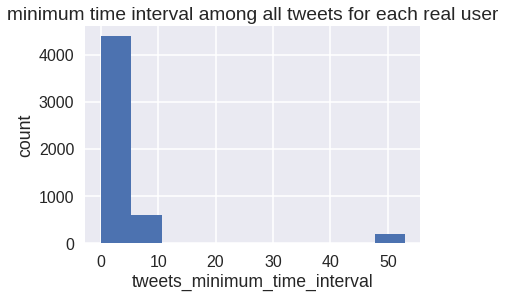

In [ ]:
# quick plots
plt.figure(figsize=(6,4))
hist_plot(tweets_0['tweet_time_min'], 'tweets_minimum_time_interval','count', 'minimum time interval among all tweets for each real user')

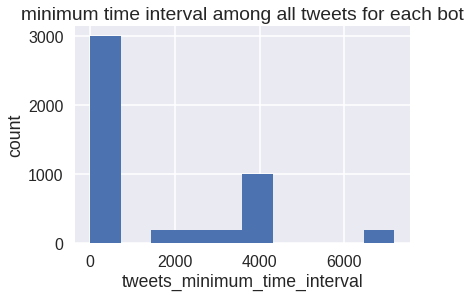

In [ ]:
# quick plots
plt.figure(figsize=(6,4))
hist_plot(tweets_1['tweet_time_min'], 'tweets_minimum_time_interval','count', 'minimum time interval among all tweets for each bot')

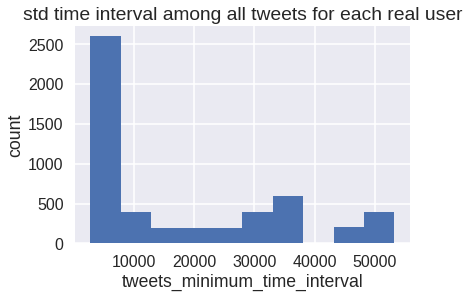

In [ ]:
# quick plots
plt.figure(figsize=(6,4))
hist_plot(tweets_0['tweet_time_std'], 'tweets_minimum_time_interval','count', 'std time interval among all tweets for each real user')

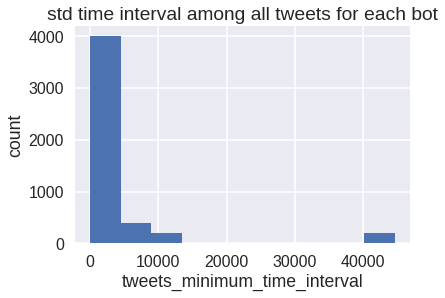

In [ ]:
# quick plots
plt.figure(figsize=(6,4))
hist_plot(tweets_1['tweet_time_std'], 'tweets_minimum_time_interval','count', 'std time interval among all tweets for each bot')

From the four plots above, it looks like the bots have significantly smaller std of tweet interval times (which implies more uniform patter) than actual users. <br/>

<mark> need to show same range for comparisons <mark>

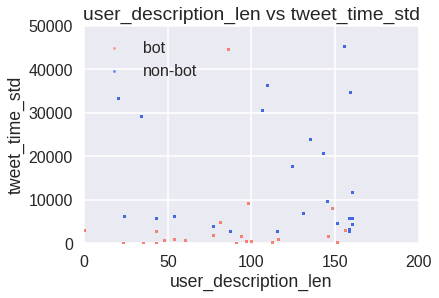

In [ ]:
# quick plots
plt.figure(figsize=(6,4))
scatterplot('user_description_len', 'tweet_time_std', [0,200], [0,50000])

It was quite obvious from the plot above that non-bot users tend to have account description with mostly around maximum allowed characters. In contrast, the bots tend to have significantly shorter descriptions and much more even distribution. <br/>

The standard deviation of tweet time interval for each account seems be able to tell bot and non-bot apart very well - the bots tend to have significantly smaller tweet_time_std, while the non-bots tend to have much larger std.

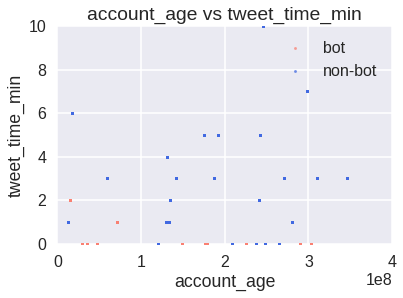

In [ ]:
# quick plots
plt.figure(figsize=(6,4))
scatterplot('account_age', 'tweet_time_min', [0,400000000], [0,10])

it seems that bots tend to have longer min tweet intervals with newer accounts, and longer tweet time itnerval with older accounts. In contrast, it seems non-bot users have shorter minimum tweet intervals with newer accounts; however, the minimum tweet interval increase with the increase of account age.

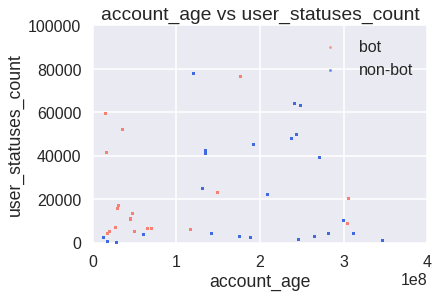

In [ ]:
# quick plots
plt.figure(figsize=(6,4))
scatterplot('account_age', 'user_statuses_count', [0,400000000], [0,100000])

It seems the bot tend to have significantly shorter account age and significantly more tweets than non-bot accounts with the same account age.

[Back to TOC](#TOC) <br/>
<a id ='Relations-in-Data'></a>
#### 3.5 - Relations in Data

<mark> draft draft - NEED UPDATES <mark>

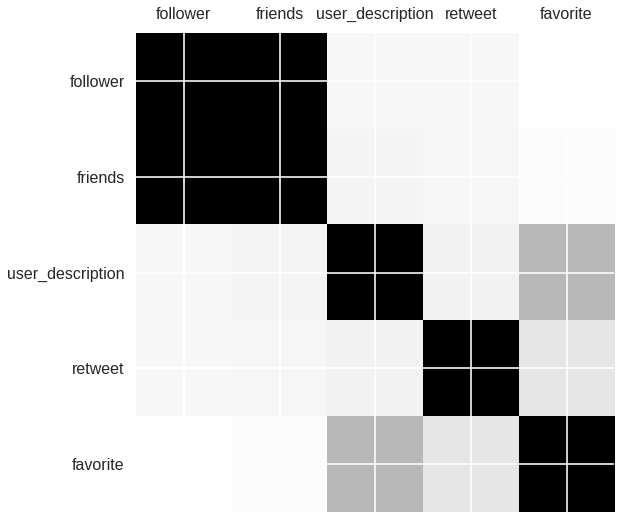

In [ ]:
# correlation matrix
# to be updated

fig, ax = plt.subplots()

col_corr = ['user_followers_count', 'user_friends_count', 'user_description_len', 'retweet_count', 'user_favourites_count']
labels_corr = ['follower', 'friends', 'user_description', 'retweet', 'favorite']
ax.matshow(tweets_df[col_corr].corr())
ax.set_xticklabels([''] + labels_corr)
ax.set_yticklabels([''] + labels_corr);

In [ ]:
# to be refined

scatter_matrix(tweets_df[col_pred_numerical], alpha=0.5, figsize=(25,20));

In [ ]:
# correlation matrix - to be udpated
pd.DataFrame(tweets_df[col_corr].corr())

,user_followers_count,user_friends_count,user_description_len,retweet_count,user_favourites_count
user_followers_count,1.000000,0.991854,-0.017684,-0.019123,-0.094587
user_friends_count,0.991854,1.000000,0.000681,-0.013643,-0.072485
user_description_len,-0.017684,0.000681,1.000000,0.020562,0.329083
retweet_count,-0.019123,-0.013643,0.020562,1.000000,0.101225
user_favourites_count,-0.094587,-0.072485,0.329083,0.101225,1.000000


[Back to TOC](#TOC) <br/>
<a id ='Standardization'></a>
#### 3.6- Standardization

standardize numerical features

In [ ]:
# current feature types
tweets_df.dtypes

favorite_count                         int64
id                                     int64
in_reply_to_screen_name                int64
is_quote_status                        int64
retweet_count                          int64
retweeted_status                       int64
user_description                      object
user_favourites_count                float64
user_followers_count                   int64
user_friends_count                   float64
user_listed_count                    float64
user_location                         object
user_name                             object
user_profile_use_background_image     object
user_statuses_count                    int64
screen_name                           object
class_boto                            object
boto_univ                            float64
class_verified                       float64
text_rt                               object
text_tweet                            object
tweet_time_mean                      float64
tweet_time

In [ ]:
from sklearn import preprocessing

def standardize(df):
    col_names = df.columns.values
    scaler = preprocessing.StandardScaler()
    df_std = pd.DataFrame(scaler.fit_transform(df), columns=col_names)
    return df_std

In [ ]:
# create a new copy with numercial columns standardized
tweets_df[col_pred_numerical] = standardize(tweets_df[col_pred_numerical])

In [ ]:
# check if the copy 
display(tweets_df.describe())
display(tweets_df.head())

,favorite_count,id,in_reply_to_screen_name,is_quote_status,retweet_count,retweeted_status,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,boto_univ,class_verified,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max,user_description_len,account_age,tweet_len_mean,tweet_len_std,tweet_word_mean,tweet_word_std,retweet_len_mean,retweet_len_std,retweet_word_mean,retweet_word_std
count,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9990.0,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9990.000000,9990.000000,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9990.000000,9790.000000,9790.000000,9790.000000,9790.000000,5590.000000,5590.000000,5590.000000,5590.000000
mean,1.138006e-17,1.067710e+18,-1.138006e-17,-2.276013e-17,-8.535048e-18,0.0,-2.276013e-17,1.138006e-17,3.983022e-17,-1.138006e-17,-2.276013e-17,0.091691,0.480480,1.536309e-16,-2.276013e-17,2.276013e-17,1.024206e-16,8.535048e-17,0.000000,118.687034,46.989872,4.766072,2.638058,191.909435,80.416308,4.697703,2.608362
std,1.000050e+00,4.692141e+15,1.000050e+00,1.000050e+00,1.000050e+00,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.166270,0.499644,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050,45.197972,34.712563,0.687878,0.570048,19.645234,7.968795,0.101774,0.086884
min,-2.089164e-01,1.041673e+18,-3.843802e-01,-3.283054e-01,-1.124659e-01,0.0,-6.298740e-01,-2.780557e-01,-2.585778e-01,-3.755700e-01,-3.643929e-01,0.002730,0.000000,-7.181639e-01,-7.413182e-01,-4.340459e-01,-7.537232e-01,-2.003790e+00,-1.315791,14.050000,0.000000,4.000000,1.361082,147.967213,65.687936,4.501567,2.365080
25%,-2.089164e-01,1.067765e+18,-3.843802e-01,-3.283054e-01,-1.124659e-01,0.0,-6.297831e-01,-2.671751e-01,-2.573135e-01,-3.589277e-01,-3.423041e-01,0.005213,0.000000,-6.480534e-01,-6.715426e-01,-4.340459e-01,-6.959020e-01,-9.000498e-01,-0.999287,94.000000,15.132380,4.350230,2.335403,175.037037,73.715149,4.615609,2.557134
50%,-2.089164e-01,1.069833e+18,-3.843802e-01,-3.283054e-01,-1.124659e-01,0.0,-5.824236e-01,-2.238274e-01,-2.303850e-01,-2.923582e-01,-2.746820e-01,0.021041,0.000000,-4.788224e-01,-4.674628e-01,-4.327291e-01,-3.883163e-01,4.017339e-02,-0.115295,118.500000,36.380043,4.611089,2.536109,201.076923,79.579214,4.689600,2.615336
75%,-2.089164e-01,1.070294e+18,-3.843802e-01,-3.283054e-01,-1.048324e-01,0.0,1.803285e-01,-1.187455e-01,-1.160337e-01,-1.536718e-01,-8.613091e-02,0.075193,1.000000,1.923434e-01,5.919871e-02,-4.294371e-01,2.875157e-01,9.803966e-01,0.941024,138.085000,78.848861,4.945022,2.922850,203.521127,85.912335,4.775988,2.657264
max,5.513018e+01,1.070615e+18,2.601591e+00,3.045944e+00,6.063850e+01,0.0,2.820645e+00,6.628141e+00,6.588782e+00,5.987363e+00,6.122768e+00,0.661264,1.000000,3.140480e+00,2.852062e+00,4.297936e+00,3.045591e+00,1.266551e+00,1.978291,222.770000,105.807394,8.035714,5.134353,222.006536,102.230390,4.910280,2.749550


,favorite_count,id,in_reply_to_screen_name,is_quote_status,retweet_count,retweeted_status,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_profile_use_background_image,user_statuses_count,screen_name,class_boto,boto_univ,class_verified,text_rt,text_tweet,tweet_time_mean,tweet_time_std,tweet_time_min,tweet_time_max,user_description_len,account_age,tweet_len_mean,tweet_len_std,tweet_word_mean,tweet_word_std,retweet_len_mean,retweet_len_std,retweet_word_mean,retweet_word_std
0,-0.208916,1070614540746977281,-0.38438,-0.328305,-0.051834,0.0,INDEPENDENCE OR BUST ..... Tweets and retweets...,0.006298,-0.099137,-0.064326,-0.358928,SCOTLAND,Do McK,True,0.216754,do_mck,0,0.005213,0.0,Have you seen @jeremycorbyn savaging the torie...,None,-0.697798,-0.555514,-0.433388,-0.468257,-0.225542,-0.124688,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
1,-0.208916,1070614514238922753,-0.38438,-0.328305,0.233444,0.0,INDEPENDENCE OR BUST ..... Tweets and retweets...,0.006298,-0.099137,-0.064326,-0.358928,SCOTLAND,Do McK,True,0.216754,do_mck,0,0.005213,0.0,In your street there lives someone who moves t...,None,-0.697798,-0.555514,-0.433388,-0.468257,-0.225542,-0.124688,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
2,-0.208916,1070614428859727872,-0.38438,-0.328305,-0.109194,0.0,INDEPENDENCE OR BUST ..... Tweets and retweets...,0.006298,-0.099137,-0.064326,-0.358928,SCOTLAND,Do McK,True,0.216754,do_mck,0,0.005213,0.0,"The Unite general secretary, Len McCluskey war...",None,-0.697798,-0.555514,-0.433388,-0.468257,-0.225542,-0.124688,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
3,-0.208916,1070614351076298753,-0.38438,-0.328305,-0.104396,0.0,INDEPENDENCE OR BUST ..... Tweets and retweets...,0.006298,-0.099137,-0.064326,-0.358928,SCOTLAND,Do McK,True,0.216754,do_mck,0,0.005213,0.0,"“The Scottish Parliament, speaking for the Sco...",None,-0.697798,-0.555514,-0.433388,-0.468257,-0.225542,-0.124688,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836
4,-0.208916,1070614262857588736,-0.38438,-0.328305,0.162997,0.0,INDEPENDENCE OR BUST ..... Tweets and retweets...,0.006298,-0.099137,-0.064326,-0.358928,SCOTLAND,Do McK,True,0.216754,do_mck,0,0.005213,0.0,If there was a second EU referendum \n\nHow wo...,None,-0.697798,-0.555514,-0.433388,-0.468257,-0.225542,-0.124688,162.0,65.630785,4.068966,2.468777,163.222222,79.950073,4.608677,2.542836


In [ ]:
# save to json
tweets_df.to_json('50_accounts_200_tweets_each_final_std.json')

[Back to TOC](#TOC) <br/>
<a id ='Models'></a>
### 4 - Models

<mark> Some Text Here </mark> <br>
<mark> for threshold, we are using 0.5 across all models </mark>

In [ ]:
# read the data
tweets_df = pd.read_json('50_accounts_200_tweets_each_final_std.json')

In [ ]:
# Train/Test split 
'''
change as needed, do we want test_size of .25?
'''
train_tweets_df, test_tweets_df = train_test_split(tweets_df, test_size=.25, 
                                                       stratify=tweets_df.class_verified, random_state=99)

In [ ]:
with open('col_pred_numerical.txt', 'r') as fp:
  col_pred_numerical = fp.read().split(',')
with open('col_boto.txt', 'r') as fp:
  col_pred_numerical = fp.read().split(',')
with open('col_response.txt', 'r') as fp:
  col_pred_numerical = fp.read().split(',')
with open('col_pred_text.txt', 'r') as fp:
  col_pred_numerical = fp.read().split(',')
with open('col_id.txt', 'r') as fp:
  col_pred_numerical = fp.read().split(',')
with open('col_verified.txt', 'r') as fp:
  col_pred_numerical = fp.read().split(',')

In [ ]:
# write a function to split the data
def split_data(df):
    # num_pred: standardized numerical predictors - what we will be using for most of the models
    # text_pred: text features that are associated with the tweets - only useful for NLP
    # response: response - manually verified classification. 1=bot; 0=non-bot
    # ids: 'id'
    # boto: botometer values
    num_pred, text_pred, response = df[col_pred_numerical], df[col_pred_text], df['class_verified']
    ids, boto = df['id'], df[col_boto]
    return num_pred, text_pred, response, ids, boto

In [ ]:
# get the predictors, responses, and other features from train and test set
xtrain, xtrain_text, ytrain, train_id, train_boto = split_data(train_tweets_df)
xtest, xtest_text, ytest, test_id, test_boto = split_data(test_tweets_df)

In [ ]:
# create a dictioary to store all our models
models_list = {}

[Back to TOC](#TOC) <br/>
<a id ='Baseline-Model'></a>
#### 4.1 - Baseline Model - Naive Bayes

<mark> TO DO, optional?  </mark>

[Back to TOC](#TOC) <br/>
<a id ='Baseline-Model'></a>
#### 4.2 - Linear Regression

<mark> TO DO: Samsara </mark>

In [ ]:
# multiple linear regression(no poly)on numerical predictors
X_train = sm.add_constant(xtrain)
X_test = sm.add_constant(xtest)
y_train = ytrain.reshape(-1,1)
y_test = ytest.reshape(-1,1)

In [ ]:
# Fit and summarize OLS model
model = OLS(y_train, X_train)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     413.1
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:19:31   Log-Likelihood:                -2950.1
No. Observations:                7492   AIC:                             5936.
Df Residuals:                    7474   BIC:                             6061.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4792      0.004    115.450      0.000       0.471       0.487
extended_entities           0.0384      0.005      7.679      0.000       0.029       0.048
favorite_count              0.0048      0.004      1.174      0.241      -0.003       0.013
in_reply_to_screen_name    -0.1882      0.006    -33.468      0.000      -0.199      -0.177
is_quote_status            -0.0361      0.004     -8.228      0.000      -0.045      -0.028
retweet_count              -0.0064      0.004     -1.497      0.134      -0.015       0.002
retweeted_status           -0.2210      0.007    -32.012      0.000      -0.235      -0.207
user_favourites_count      -0.0990      0.005    -19.563      0.000      -0.109      -0.089
user_followers_count       -0.4058      0.038    -10.554      0.000      -0.481      -0.330
user_friends_count          0.3922      0.044      9.012      0.000       0.307       0.477
user_listed_count           0.0433      0.007      5.982      0.000       0.029       0.058
user_statuses_count        -0.1154      0.026     -4.447      0.000      -0.166      -0.065
tweet_time_mean            -0.1016      0.013     -7.589      0.000      -0.128      -0.075
tweet_time_std             -0.3413      0.021    -16.401      0.000      -0.382      -0.300
tweet_time_min              0.0445      0.006      7.927      0.000       0.033       0.055
tweet_time_max              0.3274      0.021     15.827      0.000       0.287       0.368
user_description_len        0.0457      0.005      8.849      0.000       0.036       0.056
account_age                -0.0050      0.005     -0.980      0.327      -0.015       0.005
==============================================================================
Omnibus:                       32.539   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.840
Skew:                          -0.160   Prob(JB):                     7.39e-08
Kurtosis:                       3.056   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_hat_train = results.predict()
y_hat_test = results.predict(exog=X_test)

# get Train & Test R^2
print('Train R^2 = {}'.format(results.rsquared))
print('Test R^2 = {}'.format(r2_score(test_tweets_df['class_verified'], y_hat_test)))

Train R^2 = 0.4844590700814966
Test R^2 = 0.4832952963654841


In [ ]:
# accuracy score
ols_train_acc = accuracy_score(y_train, results.predict(X_train).round())
ols_test_acc = accuracy_score(y_test, results.predict(X_test).round())
print("Training accuracy is {:.4}%".format(ols_train_acc*100))
print("Test accuracy is {:.4} %".format(ols_test_acc*100))

Training accuracy is 82.84%
Test accuracy is 82.39 %


In [ ]:
# save model to the list
models_list["ols"] = model

[Back to TOC](#TOC) <br/>
<a id ='Baseline-Model'></a>
#### 4.2a - Ridge

<mark> huan: I think we'll need to include some kind of dimension reduction techniques therefore added lasso and ridge, thinking about pca as well <mark>

In [ ]:
alphas = np.array([.01, .05, .1, .5, 1, 5, 10, 50, 100])
fitted_ridge = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

In [ ]:
# accuracy score
ridge_train_acc = accuracy_score(y_train, fitted_ridge.predict(X_train).round())
ridge_test_acc = accuracy_score(y_test, fitted_ridge.predict(X_test).round())
print("Training accuracy is {:.4}%".format(ridge_train_acc*100))
print("Test accuracy is {:.4} %".format(ridge_test_acc*100))

Training accuracy is 82.84%
Test accuracy is 82.39 %


In [ ]:
# save model to the list
models_list["ridge"] = fitted_ridge

[Back to TOC](#TOC) <br/>
<a id ='Baseline-Model'></a>
#### 4.2b - Lasso
<mark> huan: I think we'll need to include some kind of dimension reduction techniques therefore added lasso and ridge, thinking about pca as well <mark>

In [ ]:
fitted_lasso = LassoCV(alphas=alphas, max_iter=100000, cv=5).fit(X_train, y_train)

In [ ]:
# accuracy score
lasso_train_acc = accuracy_score(y_train, fitted_lasso.predict(X_train).round())
lasso_test_acc = accuracy_score(y_test, fitted_lasso.predict(X_test).round())
print("Training accuracy is {:.4}%".format(lasso_train_acc*100))
print("Test accuracy is {:.4} %".format(lasso_test_acc*100))

Training accuracy is 82.29%
Test accuracy is 82.03 %


In [ ]:
# save model to the list
models_list["lasso"] = fitted_lasso

[Back to TOC](#TOC) <br/>
<a id ='Baseline-Model'></a>
#### 4.2c - Comparison of OLS, Ridge, and Lasso

<mark> TO DO </mark>

[Back to TOC](#TOC) <br/>
<a id ='Baseline-Model'></a>
#### 4.3 - Logistic Regression

<mark> Nisrine </mark>

In [ ]:
X_train = sm.add_constant(xtrain)
X_test = sm.add_constant(xtest)

logistic_model = LogisticRegression().fit(X_train, ytrain)

logistic_model_score = logistic_model.score(X_test, ytest)

models_list["simple_logistic"] = logistic_model

print("Train set score: {0:4.4}%".format(logistic_model.score(X_train, ytrain)*100))
print("Test set score: {0:4.4}%".format(logistic_model.score(X_test, ytest)*100))

Train set score: 81.02%
Test set score: 80.94%


[Back to TOC](#TOC) <br/>
<a id ='Logistic-Regression'></a>
#### 4.3a - Logistic Regression with cross validation

<mark> Nisrine, team please check </mark>

In [ ]:
logistic_model_cv = LogisticRegressionCV(Cs=[1,10,100,1000,10000], cv=3, penalty='l2', 
                                       solver='newton-cg').fit(X_train,ytrain)

models_list["simple_logistic_Cross_Validation"] = logistic_model_cv

print("Train set score with Cross Validation: {0:4.4}%".format(logistic_model_cv.score(X_train, ytrain)*100))
print("Test set score with Cross Validation: {0:4.4}%".format(logistic_model_cv.score(X_test, ytest)*100))

Train set score with Cross Validation: 81.07%
Test set score with Cross Validation: 81.06%


[Back to TOC](#TOC) <br/>
<a id ='Logistic-Regression'></a>
#### 4.3b - Logistic Regression with polynomial degree 3

<mark> Nisrine, team please check </mark>

In [ ]:
X_train_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train)

logistic_model_poly_cv = LogisticRegressionCV(Cs=[1,10,100,1000,10000], cv=3, penalty='l2', 
                                       solver='newton-cg').fit(X_train_poly,ytrain)

models_list["poly_logistic_cv"] = logistic_model_poly_cv

X_test_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_test)
print("Train set score with Polynomial Features (degree=3) and with Cross Validation: {0:4.4}%".
      format(logistic_model_poly_cv.score(X_train_poly, ytrain)*100))
print("Test set score with Polynomial Features (degree=3) and with Cross Validation: {0:4.4}%".
      format(logistic_model_poly_cv.score(X_test_poly, ytest)*100))

Train set score with Polynomial Features (degree=3) and with Cross Validation: 96.89%
Test set score with Polynomial Features (degree=3) and with Cross Validation: 96.96%


[Back to TOC](#TOC) <br/>
<a id ='KNN'></a>
#### 4.4 - KNN

<mark> TO DO: Huan </mark>

In [ ]:
# the code below in KNN is adapted from HW2 solution

# define k values
k_values = range(1,20)

# build a dictionary KNN models
KNNModels = {k: KNeighborsRegressor(n_neighbors=k) for k in k_values}
train_scores = [KNeighborsRegressor(n_neighbors=k).fit(xtrain, ytrain).score(xtrain, ytrain) for k in k_values]
cv_scores = [cross_val_score(KNeighborsRegressor(n_neighbors=k), xtrain, ytrain, cv=5) for k in k_values]


# fit each KNN model
for k_value in KNNModels: 
    KNNModels[k_value].fit(xtrain, ytrain)

In [ ]:
# Generate predictions
knn_predicted_train = {k: KNNModels[k].predict(xtrain) for k in KNNModels}
knn_predicted_test = {k: KNNModels[k].predict(xtest) for k in KNNModels}

In [ ]:
# create a df  of train test rsquare values with corresponding k values
knn_r2_train = {k : r2_score(ytrain, knn_predicted_train[k]) for k in k_values}
knn_r2_test = { k : r2_score(ytest, knn_predicted_test[k]) for k in k_values}

knn_r2_df = pd.DataFrame(data = {"k" : tuple(knn_r2_train.keys()), 
                                    "Train R^2" : tuple(knn_r2_train.values()), 
                                    "Test R^2" : tuple(knn_r2_test.values())})
display(knn_r2_df)

,Test R^2,Train R^2,k
0,0.821984,0.909098,1
1,0.870497,0.905756,2
2,0.875264,0.906722,3
3,0.877814,0.905422,4
4,0.878307,0.900778,5
5,0.879051,0.900513,6
6,0.878999,0.896287,7
7,0.879293,0.895179,8
8,0.876313,0.892654,9
9,0.875180,0.890528,10


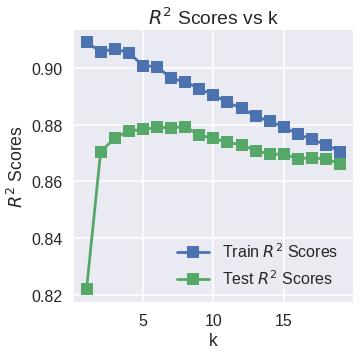

In [ ]:
# plot r2 score versus k
fig, axes = plt.subplots(figsize = (5,5))
axes.plot(knn_r2_df['k'], knn_r2_df['Train R^2'], 's-', label='Train $R^2$ Scores')
axes.plot(knn_r2_df['k'], knn_r2_df['Test R^2'], 's-', label='Test $R^2$ Scores')
axes.set_xlabel('k')
axes.set_ylabel('$R^2$ Scores')
# A generic title of this format (y vs x) is generally appropriate
axes.set_title("$R^2$ Scores vs k")
# Including a legend is very important
axes.legend();

It looks like the model reached best r2 values at k=6.

In [ ]:
# the following code was adapted from HW7 solutions
def plot_cv(ax, hyperparameter, cv_scores):
    cv_means = np.mean(cv_scores, axis=1)
    cv_stds = np.std(cv_scores, axis=1)
    handle, = ax.plot(hyperparameter, cv_means, '-*', label="Validation (mean)")
    plt.fill_between(hyperparameter, cv_means - 2.*cv_stds, cv_means + 2.*cv_stds, alpha=.3, color=handle.get_color())

Best k: 7


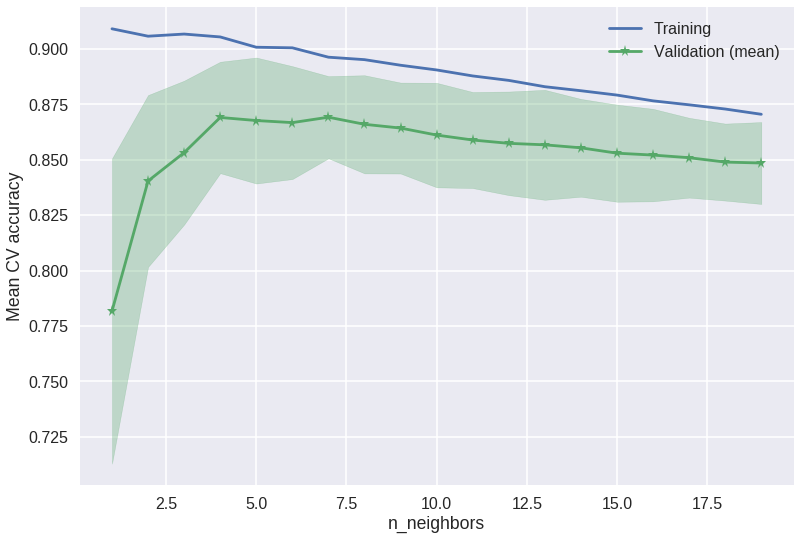

In [ ]:
# the following code was adapted from HW7 solutions
# find the best model
fig, ax = plt.subplots()
ax.plot(k_values, train_scores, '-+', label="Training")
plot_cv(ax, k_values, cv_scores)
plt.xlabel("n_neighbors")
plt.ylabel("Mean CV accuracy");
plt.legend()

best_k = k_values[np.argmax(np.mean(cv_scores, axis=1))]
print("Best k:", best_k)

In [ ]:
# save model to the list
best_k = 7
models_list["knn_7"] = KNNModels[best_k].fit(xtrain, ytrain)

In [ ]:
# evaluate classification accuracy
best_model_KNN_train_score = accuracy_score(ytrain, knn_predicted_train[best_k].round())
best_model_KNN_test_score = accuracy_score(ytest, knn_predicted_test[best_k].round())
print("Training accuracy is {:.4}%".format(best_model_KNN_train_score*100))
print("Test accuracy is {:.4} %".format(best_model_KNN_test_score*100))

Training accuracy is 96.34%
Test accuracy is 95.92 %


[Back to TOC](#TOC) <br/>
<a id ='KNN'></a>
#### 4.5 - Decision tree

<mark> Nisrine, team please check </mark>

In [ ]:
depth_list =list(range(1, 18))

cv_means = []
cv_stds = []
train_scores = []
best_model_mean = 0

for depth in depth_list:
    #Fit a decision tree to the training set
    model_DTC = DecisionTreeClassifier(max_depth=depth).fit(xtrain, ytrain)
    scores = cross_val_score(model_DTC, xtrain, ytrain, cv=5)
    
    #training set performance
    train_scores.append(model_DTC.score(xtrain, ytrain))
    
    #save best model
    if scores.mean() > best_model_mean:
            best_model_mean=scores.mean()
            best_model_DTC=model_DTC
            best_model_std =scores.std()
            
    
    #performance for 5-fold cross validation
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())
    

cv_means = np.array(cv_means)
cv_stds = np.array(cv_stds)
train_scores = np.array(train_scores)

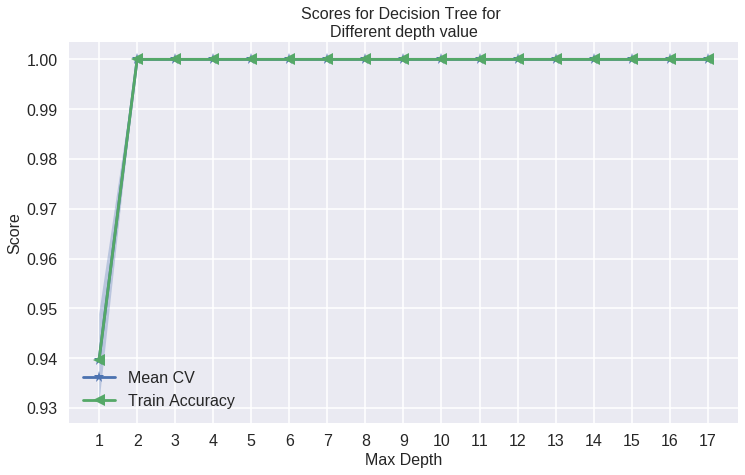

In [ ]:
plt.subplots(1, 1, figsize=(12,7))
plt.plot(depth_list, cv_means, '*-', label="Mean CV")
plt.fill_between(depth_list, cv_means - 2*cv_stds, cv_means + 2*cv_stds, alpha=0.3)
ylim = plt.ylim()
plt.plot(depth_list, train_scores, '<-', label="Train Accuracy")
plt.legend()
plt.ylabel("Score", fontsize=16)
plt.xlabel("Max Depth", fontsize=16)
plt.title("Scores for Decision Tree for \nDifferent depth value", fontsize=16)
plt.xticks(depth_list);

In [ ]:
models_list["random_forest"] = rf_model

best_model_DTC_train_score = accuracy_score(ytrain, best_model_DTC.predict(xtrain))
best_model_DTC_test_score = accuracy_score(ytest, best_model_DTC.predict(xtest))
print("Training accuracy is %.4f"%best_model_DTC_train_score)
print("Test accuracy is %.4f"%best_model_DTC_test_score)

NameError: ignored

[Back to TOC](#TOC) <br/>
<a id ='Random-Forest'></a>
#### 4.5 -Random Forest

<mark> Nisrine </mark>

In [ ]:
rf = RandomForestClassifier(max_depth=6)
rf_model = rf.fit(xtrain, ytrain)
score = rf_model.score(xtest, ytest)

models_list["random_forest"] = rf_model

print("Random Forest model score is ", score)

[Back to TOC](#TOC) <br/>
<a id ='Boosting - AdaBoost Classifier'></a>
#### 4.6 -Boosting - AdaBoost Classifier

<mark> Nisrine, team please check, we can iterate for different depths </mark>

In [ ]:
AdaBoost_models = {}
AdaBoost_scores_train = {}
AdaBoost_scores_test = {}
for e in range(1, 5):
    AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=e), n_estimators=800, learning_rate=0.05)
    AdaBoost_models[e] = AdaBoost.fit(xtrain, ytrain)
    AdaBoost_scores_train[e] = list(AdaBoost_models[e].staged_score(xtrain, ytrain))
    AdaBoost_scores_test[e] = list(AdaBoost_models[e].staged_score(xtest, ytest))

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(20,35))
for e in range(0, 4):
    ax[e].plot(AdaBoost_scores_train[e+1], label='Train')
    ax[e].plot(AdaBoost_scores_test[e+1], label='Test')
    ax[e].set_xlabel('Number of Iterations', fontsize=16)
    ax[e].set_ylabel('Accuracy', fontsize=16)
    ax[e].tick_params(labelsize=16)
    ax[e].legend( fontsize=16)
    ax[e].set_title('Depth = %s'%(e+1), fontsize=18)
fig.suptitle('Accuracy by number of Iterations\n for various Depth',y=0.92,fontsize=20);

[Back to TOC](#TOC) <br/>
<a id ='SVM'></a>
#### 4.6 -SVM

<mark> TO DO: Fayzan  - if time permits </mark>

[Back to TOC](#TOC) <br/>
<a id ='RNN'></a>
#### 4.7 -RNN

<mark> Are we doing RNN? </mark>

[Back to TOC](#TOC) <br/>
<a id ='KMeans-Clustering'></a>
#### 4.8 - K-Means Clustering

We want to explore unsupervised learning by performing k=2 KMeans clustering with numerical features, and see how the clusters align with our manually verified results.

<mark> TO DO: tune k </mark>

In [ ]:
# read the data
# tweets_df = pd.read_json('50_accounts_200_tweets_each_final_std.json')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', random_state=0).fit(xtrain.values)

In [ ]:
# add the classification result
k2 = tweets_df[col_pred_numerical]

k2['k=2'] = kmeans.labels_

In [ ]:
# create df for easy plot
kmean_0 = k2.loc[k2['k=2']==0]
kmean_1 = k2.loc[k2['k=2']==1]
class_0 = tweets_df.loc[tweets_df['class_verified']==0]
class_1 = tweets_df.loc[tweets_df['class_verified']==1]

In [ ]:
# see how many were classified as bots
print ('The size of the two clusters from kmeans clustering are {} and {}.'.format(len(kmean_0), len(kmean_1)))

The size of the two clusters from kmeans clustering are 4207 and 2985 and 300.


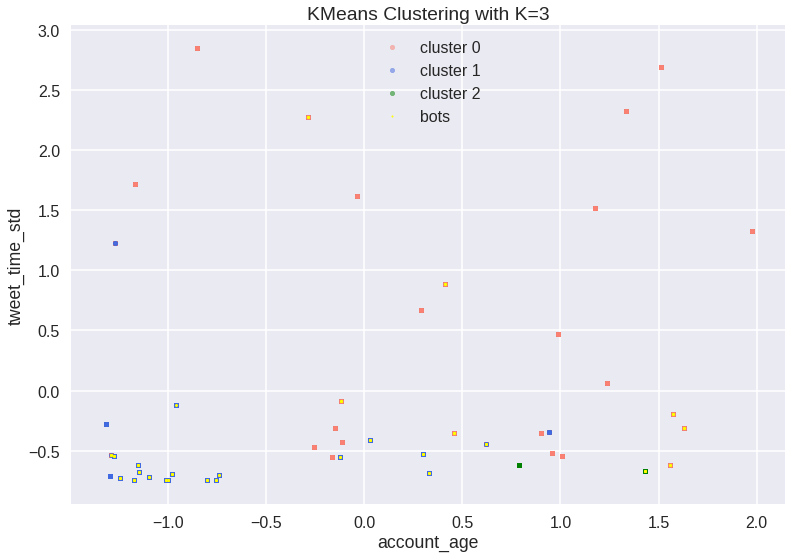

In [ ]:
# quick plot to see if it naturally come into two clusters
plt.scatter(kmean_0['account_age'], kmean_0['tweet_time_std'], c='salmon', s=20, label = 'cluster 0', alpha=0.5)
plt.scatter(kmean_1['account_age'], kmean_1['tweet_time_std'], c='royalblue', s=20, label = 'cluster 1', alpha=0.5)
#plt.scatter(class_0['account_age'], class_0['tweet_time_std'], c='red', s=2, label = 'cluster 0', alpha=0.2)
plt.scatter(class_1['account_age'], class_1['tweet_time_std'], c='yellow', s=2, label = 'bots', alpha=1)
plt.xlabel('account_age')
plt.ylabel('tweet_time_std')
plt.title('KMeans Clustering with K=2');
plt.legend();

In [ ]:
# 
verified_df = tweets_df['class_verified', 'id', ''].dropna()
verified_df = 

[Back to TOC](#TOC) <br/>
<a id ='KMeans-Clustering'></a>
#### 4.9 - Manually Verify Accounts and Compare Results
<mark> TO DO: Huan <mark>
  
  When comparing botometer scores and manually classified results, we noticed that botometer does not always predict actual bot / non-bot correctly. 

In [ ]:
# TO BE UPDATED!!!!
# read the verified dataframe
raw_df_verify = pd.read_csv('boto_verify.csv')
raw_df_verify.dropna()
raw_df_verify.head()

,Unnamed: 0,screen_name,class_boto,boto_univ,class_verified
0,0,ICVeo,1,0.661264,1.0
1,1,SamGuile2,0,0.199883,NaN
2,10,BadassJack101,0,0.002308,NaN
3,100,FAO_Scotbot,1,0.559158,1.0
4,1000,Habereglencee,0,0.199883,NaN


In [ ]:
# join features and botometer result to the verified dataframe


In [ ]:
# discussion and compare results

[Back to TOC](#TOC) <br/>
<a id ='KMeans-Clustering'></a>
#### 4.10 - Validate Botometer Results and Model Prediction Results
<mark> TO DO: Huan - need more discussion <mark>
 
We try to use a random forest to explore the subspace between botometer results and the actual result (manually verified classification). We chose to use non-linear model as we expect the relationship between botometer result and actual result to be non-linear.   <br/>
  
We want to train a model with two features plus botometer score as predictors, and the actual classification as the response. In the principle that the botometer is occasionally accurate, and we want to see under what occasions they are accurate / inaccurate, and therefore to capture the residuals between our predictions (which use botometer score as predictors) and the actual results. (* we chose to features as we want to minimize number of features, given our sample size - manually verified bot account - is only 50)

  

In [415]:
# use features and botometer score to predict the validated score

def prepare_vf(df, feature1, feature2):
  y_vf = df[['class_verified']]
  #y_vf = y_vf.dropna()
  x_vf = pd.DataFrame(df[[feature1, feature2, 'class_boto']])
  #x_vf = pd.merge(x_vf, train_tweets_df[[feature1, feature2, 'class_boto', 'id']], left_on='id', right_on='id') # TO DO: debug this line, something is wrong
  return x_vf, y_vf

x_train_vf, y_train_vf = prepare_vf(train_tweets_df, 'account_age', 'tweet_time_mean')
x_test_vf, y_test_vf = prepare_vf(test_tweets_df, 'account_age', 'tweet_time_mean')


rf_vf = RandomForestClassifier(max_depth=6)
rf_vf_model = rf_vf.fit(x_train_vf, y_train_vf)
score = rf_vf_model.score(x_test_vf, y_test_vf)

print("Random Forest model, (class_verified ~ account_age, tweet_time_mean, class_boto), the testscore is ", score)

Random Forest model, (class_verified ~ account_age, tweet_time_mean, class_boto), the testscore is  0.9791833466773419


In [ ]:
# discussion: when we can trust the model, when it is unknown

[Back to TOC](#TOC) <br/>
<a id ='KMeans-Clustering'></a>
#### 4.11 - Model Comparisons

<mark> Compare all models, compare results to Botometer results </mark>

In [ ]:
### Summary Report

models_list

In [ ]:
# copy and pasted previous code - need update
# graph references

# the following code was adapted from HW5 solutions

# your code here
plt.figure(figsize=(12,8))
sort_index = np.argsort(x_test['D29963_at'].values)

# plotting true binary response
plt.scatter(x_test['D29963_at'].iloc[sort_index], y_test.iloc[sort_index], color='black', label = 'True Response')

# plotting ols output
plt.plot(x_test['D29963_at'].iloc[sort_index], y_test_pred.iloc[sort_index], color='red', alpha=0.3, \
         label = 'Linear Regression Predictions')
# plt.plot(x_test['D29963_at'].iloc[sort_index], y_test_pred.iloc[sort_index]>0.5, color='red', ls='-.', \
#          label = 'Linear Regression Class Predictions ')


# plotting logreg prob output
plt.plot(x_test['D29963_at'].iloc[sort_index], y_test_pred_logreg_prob[sort_index], alpha=0.3,  \
         color='green', label = 'Logistic Regression Predictions Prob')
#plt.plot(x_test['D29963_at'].iloc[sort_index], y_test_pred_logreg[sort_index], color='green', ls='-.' ,label = 'Logistic Regression Predictions')

plt.axhline(0.5, c='c')
plt.legend()
plt.title('True response v/s obtained responses')
plt.xlabel('Gene predictor value')
plt.ylabel('Cancer type response');

[Back to TOC](#TOC) <br/>
<a id ='Results-and-Conclusion'></a>
### 5 - Results and Conclusion

<mark> Some Text Here </mark>

General findings (just throwing thought here, to be organized):

- ideally, we would want a large number of manually verified accounts. In real world application, we would use mechanical turk to manually identify at least 1,000 accounts and use that as our data. <br/>
- except for explicit bots / non-bot account, there are accounts that are very difficult to tell bot/non-bot even manually. One potential solution for that is to loo

[Back to TOC](#TOC) <br/>
<a id ='Summary-of-Results'></a>
#### 5.1 -Summary of Results

<mark> Some Text and Code Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='Noteworthy-Findings'></a>
#### 5.2 -Noteworthy Findings

<mark> Some Text and Code Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='Conclusion-and-Future-Work'></a>
#### 5.3 -Conclusion and Future Work

<mark> Some Text and Code Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='Literature-Review-and-Related-Work'></a>
### 6 - Literature Review and Related Work

<mark> Some Text Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='Bots-in-the-Twittersphere'></a>
#### 6.1 -Bots in the Twittersphere

<mark> Some Text and Code Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='How-Twitter-Bots-Help-Fuel-Political-Feuds'></a>
#### 6.2 -How Twitter Bots Help Fuel Political Feuds

<mark> Some Text and Code Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='The-spread-of-low-credibility-content-by-social-bots'></a>
#### 6.3 -The spread of low-credibility content by social bots

<mark> Some Text and Code Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='Twitter-Topic-Modeling-by-Tweet-Aggregation'></a>
#### 6.4 -Twitter Topic Modeling by Tweet Aggregation

<mark> Some Text and Code Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='tweepy-library'></a>
#### 6.5 -The tweepy Python library
http://www.tweepy.org <br/>

<mark> Some Text and Code Here </mark>

[Back to TOC](#TOC) <br/>
<a id ='twitter-developer'></a>
#### 6.6 -Twitter's Developer resources
https://developer.twitter.com <br/>

<mark> Some Text and Code Here </mark>